<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
The input layer contains the numerical representation of the raw data

### Hidden Layer: 
Hidden layers are layers in a deep learning network whose outputs are not viewed.

### Output Layer: 
The output layer shows the result of the activated output Neurons.

### Neuron: 
A mathematical function.

### Weight: 
A value used to modify the the Neuron output

### Activation Function: 
Function held by Neuron to determine final output

### Node Map: 
A map of nodes

### Perceptron:
A single output Neuron.

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

You give the magic bubble a data, and it eats it. Then, it sits in the sun for 45 - 50 minutes. This gives the data enough time to contemplate the meaning of existence. Then, suddently and without warning, the data will erupt and turn into a beautiful Output-fly. 

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [3]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [90]:
import numpy as np


# inputs
inputs = np.array([
    df.x1,
    df.x2
])

# weights (after iteration)
weights = np.array([
    [-1],
    [-1]
])

activation = np.dot(inputs.T, weights) + 1
# NAND Gate is 1 unless both inputs are 1, then 0
prediction = np.array([0 if x < 0 else 1 for x in activation])

In [121]:
print('Prediction:', '\t', prediction)
print('\nAny Errors?', '\t', 'No' if all(df.y == prediction) else "Yes")

Prediction: 	 [1 1 1 0]

Any Errors? 	 No


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [111]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [118]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

# Set feature and targets
features = list(diabetes)[:-1]
target = list(diabetes)[-1:]

# Instantiate normalizer
normalizer = Normalizer()

# Normalize the feature data
X_norm = normalizer.fit_transform(diabetes[features])
# Set target vector
y = diabetes[target]

In [119]:
from sklearn.model_selection import train_test_split


# Create train test split for model learning
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2,
                                                    random_state=42)

In [124]:
X_train.shape[1]

8

In [256]:
# Create perceptron object
class Perceptron(object):
    
    def __init__(self, n_iter = 10):
        self.n_iter = n_iter
    
    def __sigmoid(self, x):
        """ return sigmoid of a given value """
        return expit(x)
    
    def __sigmoid_derivative(self, x):
        """ return the sigmoid derivative of a given value """
        fx = sigmoid(x)
        return fx * (1 - fx)
    
    def get_weights(self):
        return weights

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Set seed for reproducibility
        np.random.seed(42)
        # Randomly Initialize Weights
        weights = 2 * np.random.random((X.shape[1], 1)) - 1

        for i in range(self.n_iter):
            # Weighted sum of inputs / weights
            weighted_sum = np.dot(X, weights)
            # Activate!
            activated_output = self.__sigmoid(weighted_sum)
            # Cac error
            error = y - activated_output
            # Update the Weights
            adjustments = error * self.__sigmoid_derivative(activated_output)
            weights += np.dot(X.T, adjustments)

    def predict(self, X):
        """Return class label after unit step"""
        weighted_sum = np.dot(X, weights)
        activated_output = self.__sigmoid(weighted_sum)
        return [1 if n > 0.5 else 0 for n in activated_output]

In [258]:
# Instantiate the model
model = Perceptron(n_iter = 250)

In [259]:
# Train the model
model.fit(X_train, y_train)

In [260]:
# Get model accuracy
from sklearn.metrics import accuracy_score


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

In [261]:
print("Accuracy:", "\t", '{:.2f}%'.format(accuracy*100))

Accuracy: 	 68.83%


In [292]:
# Set model weights
model_weights = dict()
for index, feature in enumerate(features):
    model_weights[feature] = model.get_weights()[index][0]

In [293]:
model_weights

{'Pregnancies': 185.23179165818428,
 'Glucose': 17.530466706879988,
 'BloodPressure': -66.27936436633664,
 'SkinThickness': -10.15489129593529,
 'Insulin': 0.31797121917332305,
 'BMI': 31.323669477542445,
 'DiabetesPedigreeFunction': 130.7571830455157,
 'Age': 3.8321983755142597}

### Pretty good!

Given that the actual results are very jumbled, it appears the the model did a fairly decent job of classifying!

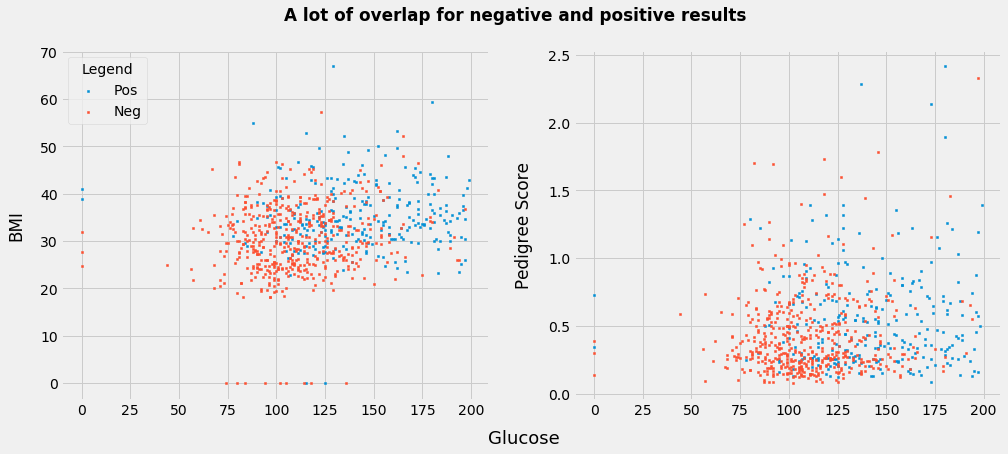

In [412]:
import matplotlib.pyplot as plt


pos = diabetes[diabetes['Outcome'] == 1]
neg = diabetes[diabetes['Outcome'] == 0]

plt.style.use('fivethirtyeight')

fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.suptitle('A lot of overlap for negative and positive results', 
             fontweight='bold')

ax = fig.add_subplot(121)
ax.scatter(pos['Glucose'], pos['BMI'], marker='s', s=2, label="Pos")
ax.scatter(neg['Glucose'], neg['BMI'], marker='s', s=2, label="Neg")
ax.set_ylabel('BMI', labelpad=15)
ax.legend(title="Legend")

ax2 = fig.add_subplot(122)
ax2.scatter(pos['Glucose'], pos['DiabetesPedigreeFunction'], marker='s', s=2, label="Pos")
ax2.scatter(neg['Glucose'], neg['DiabetesPedigreeFunction'], marker='s', s=2, label="Neg")
ax2.set_ylabel('Pedigree Score', labelpad=15)

fig.text(x=.475, y=-.03, s='Glucose', fontsize=18)
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?